# Author : Dnyanada Jalindre
# Task 1 : Prediction using Supervised ML 
## Predict the percentage of an student based on the no. of study hours

## 1. Importing Libraries and dataset

In [127]:
# Importing required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
# Loading our dataset
dataset_url = 'http://bit.ly/w-data'
data = pd.read_csv(dataset_url)

In [5]:
# Let's check how our data looks..!
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2. Data Summary

In [6]:
# Data summary can be generated by using describe() method.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# info() is useful for checking data types and any missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 3. Let's visualize the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

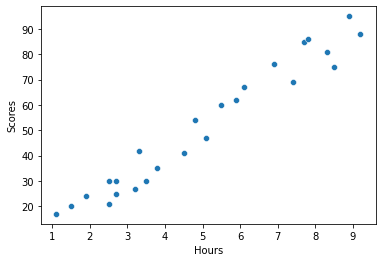

In [20]:
# Using scatterplot for visualizing relationship between hours and scores.
sns.scatterplot(x=data['Hours'], y=data['Scores'])

## 4. Locating Dependent and Independent Variable

In [92]:
# as we know score depends on amount of time a student studies.
# that's why Hours: independent feature & Scores: dependent feature.
X = data['Hours'].values
y = data['Scores'].values

In [93]:
X[:5]

array([2.5, 5.1, 3.2, 8.5, 3.5])

In [94]:
y[:5]

array([21, 47, 27, 75, 30], dtype=int64)

## 5. Splitting the data into train and test set

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test  :", X_test.shape, " y_test  :", y_test.shape)

X_train : (20,) y_train : (20,)
X_test  : (5,)  y_test  : (5,)


In [106]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

## 6. Fitting Linear regression model

In [107]:
# Creating an instance of LinearRegression()
lr = LinearRegression()

# Fitting our LinearRegression model on training set.
lr.fit(X_train, y_train)

LinearRegression()

In [108]:
# Making predictions on our future data(x_test)
y_pred = lr.predict(X_test)

In [109]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [110]:
# Let's see the difference between actual and predicted values.
df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [111]:
# checking taining and testing scores 
print("Training score : ", lr.score(X_train, y_train))
print("Testing score  : ", lr.score(X_test, y_test))

Training score :  0.9515510725211552
Testing score  :  0.9454906892105356


Coefficient:  [9.91065648] 
Intercept  :  2.018160041434683


C:\Users\Dnyanada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


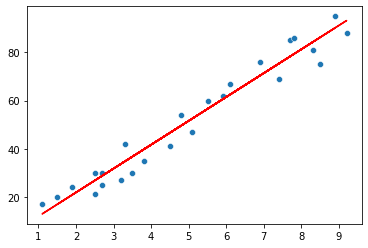

In [126]:
# plotting regression line
# Equation for line : y = mx + c
print("Coefficient: ", lr.coef_, "\nIntercept  : ", lr.intercept_)

line = lr.coef_ * X + lr.intercept_

sns.scatterplot(X, y)
plt.plot(X, line, color='red')
plt.show()

## 7. Accuracy

In [138]:
# R2_score is used as accuracy measure for regression analysis.
print("R-2 Score\t\t : ", r2_score(y_test, y_pred))
print("Mean absolute error\t : ", mean_absolute_error(y_test, y_pred))
print("Mean squared error\t : ", mean_squared_error(y_test, y_pred))
print("Root Mean squared error\t : ", np.sqrt(mean_squared_error(y_test, y_pred)))

R-2 Score		 :  0.9454906892105356
Mean absolute error	 :  4.183859899002975
Mean squared error	 :  21.5987693072174
Root Mean squared error	 :  4.6474476121003665


## Now...let's predict for custom input

In [142]:
hours = 9.25
X = np.array([hours])
X = X.reshape(-1,1)
prediction = lr.predict(X)

In [150]:
print("Total Hours\t : {}".format(hours))
print("Score should be\t : {}".format(round(prediction[0],2)))

Total Hours	 : 9.25
Score should be	 : 93.69
